In [1]:
%pip install numpy==2.2.3 pandas==2.2.3 matplotlib==3.10.0 seaborn==0.13.2 scipy==1.15.2 statsmodels==0.14.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Statistics** plays a crucial role in machine learning by providing the theoretical foundation and practical tools necessary for building robust and efficient models. It can also help in the preprocessing steps in machine learning, like gaining a better understanding of the data or feature engineering

svolge un ruolo cruciale nell'apprendimento automatico, fornendo le basi teoriche e gli strumenti pratici necessari per costruire modelli robusti ed efficienti. Può anche aiutare nelle fasi di pre-elaborazione nell'apprendimento automatico, come ottenere una migliore comprensione dei dati o dell'ingegneria delle feature

**Probability** can help in understanding and quantifying the uncertainty associated with the predictions of a machine learning model.

può aiutare a comprendere e quantificare l'incertezza associata alle previsioni di un modello di apprendimento automatico.

# Descriptive Statistics








Le statistiche descrittive aiutano a riassumere e organizzare i dati in modo che possano essere facilmente compresi. Queste statistiche ci consentono di analizzare le distribuzioni dei dati e di identificare le caratteristiche chiave dei dati.

In [3]:
np.random.seed(42)

n = 1000

data = {
    'Age': np.random.randint(18, 70, n),
    'Salary': np.abs(np.random.normal(50000, 15000, n)),
    'Hours_Worked_Per_Week': np.random.randint(20, 60, n),
    'Years_of_Experience': np.random.lognormal(mean=1, sigma=0.7, size=n)
}

df = pd.DataFrame(data)

df.head()

,Age,Salary,Hours_Worked_Per_Week,Years_of_Experience
0,56,25903.305196,56,2.325089
1,69,53051.954538,23,7.712978
2,46,38654.738821,23,0.886359
3,32,28666.194356,39,1.522041
4,60,40301.406736,29,2.528741


## Measures of central tendency

Queste misure descrivono il valore centrale o tipico di un set di dati: media, mediana, moda...

-MEDIANA se ordiniamo i valori dal più piccolo al maggiore la mediana è il valore che sta in mezzo, se il numero di valori è pari si prendono i due valori in mezzo e si fanno in mezzo

-trim_mean media troncata che esclude i valori estremi, la media è molto sensibile agli outliers

In [4]:
print("Mean Salary:", df['Salary'].mean().item())
print("Median Salary:", df['Salary'].median())
df['Age'].mode()[0]

Mean Salary: 50863.622304299795
Median Salary: 50807.53098571996


np.int32(43)

In [5]:
from scipy.stats import trim_mean
trim_mean(df['Salary'], 0.1)

np.float64(50788.51369800581)

In [6]:
df['Salary_With_Outliers'] =  df['Salary']
n_outliers = 20
df.loc[np.random.choice(df.index, n_outliers), 'Salary_With_Outliers'] *= 10

print("Mean Salary with outliers:", df['Salary_With_Outliers'].mean().item())
print("Median Salary with outliers:", df['Salary_With_Outliers'].median())

Mean Salary with outliers: 58875.73390408674
Median Salary with outliers: 51170.02623472782


## Measures of dispersion

identificano quanto la distribuzione è ampia o stretta

These measures describe how spread out the data is: range, variance, standard deviation, quantiles, interquantile range...

The **variance** measures how far each data point in a dataset is from the mean. It is defined as:

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2
$$

where:
- $x_i$ are the individual data points,
- $\bar{x}$ is the mean of the data points,
- $N$ is the total number of data points in the population,

The **standard deviation** is the square root of the variance. It is useful because it is expressed in the same units as the original data, making it easier to interpret.

Nella cella sotto sto calcolando
- Differenza massimo-minimo: Ampiezza dei salari.
- Varianza: Misura della dispersione dei salari rispetto alla media.
- Deviazione standard: Una misura di dispersione che ha le stesse unità dei dati e rende più facile l'interpretazione rispetto alla varianza.

In [7]:
df['Salary'].max() - df['Salary'].min()
df['Salary'].var()
df['Salary'].std()

np.float64(14823.245521256558)

**I quantili** dividono una distribuzione di probabilità in intervalli continui con probabilità uguali. C'è un quantile in meno rispetto al numero di gruppi creati. I quantili comuni hanno nomi speciali, come quartili (quattro gruppi), decili (dieci gruppi) e percentili (100 gruppi).

un caso particolare di un quantile è il valore mediano

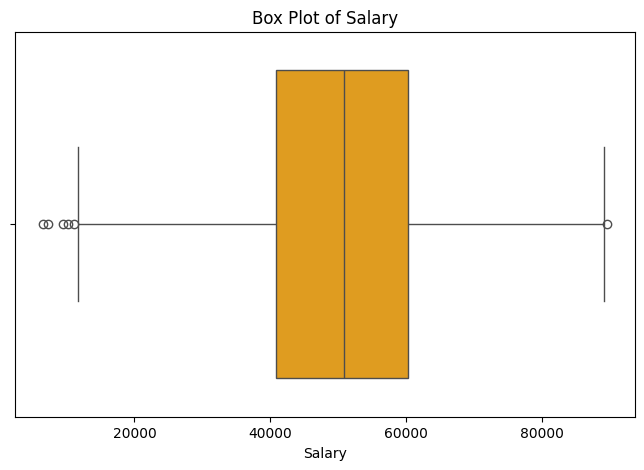

In [8]:
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)

iqr = q3 - q1

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Salary'], color='orange')
plt.title('Box Plot of Salary')
plt.show()

In [9]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
outliers

,Age,Salary,Hours_Worked_Per_Week,Years_of_Experience,Salary_With_Outliers
164,54,9546.700356,20,3.951732,9546.700356
186,37,10235.452874,45,2.212721,10235.452874
273,50,89485.730973,54,3.450132,89485.730973
579,68,7271.860691,55,7.668832,7271.860691
619,54,6556.169327,25,1.746992,6556.169327
873,32,11134.365618,56,0.374371,11134.365618


The *z-score*  is the number of standard deviations by which the value of a data point is above or below the mean value. It is calculated by subtracting the mean from an individual observation and then dividing the difference by the standard deviation:

$$
Z = \frac{x - \mu}{\sigma}
$$

The process of converting a raw score into a standard score is called standardizing: it is a type of normalization that works well when the data is normally distributed.

Lo z-score è il numero di deviazioni standard per cui il valore di un punto dati è al di sopra o al di sotto del valore medio. Si calcola sottraendo la media da una singola osservazione e poi dividendo la differenza per la deviazione standard

Il processo di conversione di un punteggio grezzo in un punteggio standard è detto standardizzazione: è un tipo di normalizzazione che funziona bene quando i dati sono distribuiti normalmente.

In [10]:
from scipy.stats import zscore
df['Salary_Z'] = zscore(df['Salary'])
df[['Salary', 'Salary_Z']]

df ['Salary_Standardzied'] = (df['Salary'] - df['Salary'].mean()) / df['Salary'].std()

le normalizzazioni si fanno perchè per alcuni modelli statistici sono necessarie. se immaginiamo di avere un dataset con colonne misurate con scale diverse ci sono modelli per cui questa cosa è un problema quindi normalizzare le colonne per averle sulla stessa scala è un modo per evitare di ingannare i modelli 

## Frequency Distributions

Una distribuzione di frequenza è una rappresentazione statistica che mostra quante volte ciascun valore (o intervallo di valori) appare in un dataset. In altre parole, descrive come i dati sono distribuiti in un determinato intervallo o gruppo, indicandone la frequenza di occorrenza.

In [11]:
df['Hours_Worked_Per_Week'].value_counts().sort_index().reset_index()

,Hours_Worked_Per_Week,count
0,20,21
1,21,20
2,22,25
3,23,31
4,24,19
5,25,26
6,26,18
7,27,27
8,28,26
9,29,19


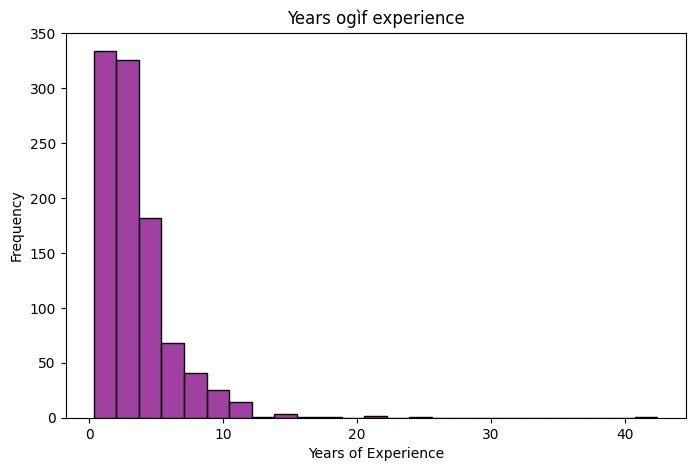

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Years_of_Experience'], bins=25, kde=False, color='purple')
plt.title('Years ogìf experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

**Skewness** measures the asymmetry of a probability distribution.
- Negative skew: the distribution is left-skewed/left-tailed
- Positive skew: the distribution is right-skewed/right-tailed

Skewness indicates the direction and relative magnitude of a distribution's deviation from the normal distribution (this is important because many statistical methods assume a normal distribution).

**Kurtosis** measures the "tailedness" of a probability distribution, indicating whether data has more or fewer extreme values (outliers) than a normal distribution.

- If the kurtosis is positive, the distribution is *leptokurtic* (heavy tails, more extreme values).
- If the kurtosis is negative the distribution is *platykurtic* (light tails, fewer extreme values).

La skewness (o asimmetria) è una misura statistica che indica la asimmetria della distribuzione di un insieme di dati rispetto alla sua media. In altre parole, la skewness misura quanto i dati si discostano da una distribuzione simmetrica (come la distribuzione normale).

La skewness fornisce informazioni sulla direzione e l'intensità della distorsione della distribuzione:

Skewness positiva (o asimmetria a destra): Se la distribuzione è asimmetrica a destra, la code a destra della media sono più lunghe o più pesanti. In altre parole, ci sono alcuni valori estremamente alti che allungano la coda verso destra. In questo caso, la skewness avrà un valore positivo.

Esempio: Un insieme di dati come i redditi, dove pochi individui guadagnano molto di più rispetto alla maggior parte, potrebbe avere una skewness positiva.
Skewness negativa (o asimmetria a sinistra): Se la distribuzione è asimmetrica a sinistra, la coda a sinistra della media è più lunga o più pesante. In altre parole, ci sono valori estremamente bassi che allungano la coda verso sinistra. In questo caso, la skewness avrà un valore negativo.

Esempio: Un insieme di dati come l'età alla pensione, dove la maggior parte delle persone si ritira a una certa età, ma alcuni si ritirano molto più presto, potrebbe avere una skewness negativa.
Skewness nulla: Se la distribuzione è simmetrica, come la distribuzione normale, la skewness sarà 0 (o molto vicina a zero). Questo significa che la distribuzione non ha una coda più lunga da un lato rispetto all'altro.

- Skewness positiva (> 0): La distribuzione è inclinata verso destra (coda lunga verso destra).
- Skewness negativa (< 0): La distribuzione è inclinata verso sinistra (coda lunga verso sinistra).
- Skewness = 0: La distribuzione è perfettamente simmetrica.

La kurtosis (o curtosi) è una misura statistica che descrive la forma della distribuzione dei dati, in particolare la "pesantezza" delle code della distribuzione rispetto a una distribuzione normale (che ha una kurtosis di 3). In altre parole, la kurtosis misura la concentrazione dei dati nelle code (valori estremi) e nel picco centrale della distribuzione.

Tipi di Kurtosi
Kurtosi Normale (Mesocurtica):

Una distribuzione normale ha una kurtosis di 3, che è spesso usata come riferimento. La distribuzione ha una coda "normale" e una forma simmetrica. Se una distribuzione ha una kurtosi di 3, si dice che è mesocurtica.
Kurtosi Positiva (Leptocurtica):

Una distribuzione con kurtosi maggiore di 3 è chiamata leptocurtica. Le distribuzioni leptocurtiche hanno un picco più alto e stretto rispetto alla distribuzione normale, con code più pesanti (più probabilità di valori estremi). Quindi, i dati tendono ad avere più outliers o valori estremi.
Esempio: Alcuni dati finanziari o economici, come i ritorni delle azioni, spesso hanno una kurtosi maggiore di 3.
Kurtosi Negativa (Platicurtica):

Una distribuzione con kurtosi inferiore a 3 è chiamata platicurtica. Le distribuzioni platicurtiche hanno un picco più basso e largo rispetto alla distribuzione normale, con code più leggere (meno probabilità di valori estremi).
Esempio: Una distribuzione uniforme, dove tutti i valori hanno la stessa probabilità di verificarsi, ha una kurtosi molto bassa (vicina a 1).

- Kurtosi = 3 (Mesocurtica): La distribuzione è simile a una normale (distribuzione "normale").
- Kurtosi > 3 (Leptocurtica): La distribuzione ha un picco più alto e code più pesanti, con una maggiore probabilità di valori estremi.
- Kurtosi < 3 (Platicurtica): La distribuzione ha un picco più basso e largo, con code più leggere.

In [13]:
df['Years_of_Experience'].skew()

np.float64(4.235485788845868)

In [14]:
df['Years_of_Experience'].kurt()

np.float64(38.81309692175205)

Quando la distribuzione è asimmetrica verso destra, la trasformazione logaritmica può essere utile per renderla più simmetrica.

log1p serve a calcolare il log anche quando ci sono valori zero

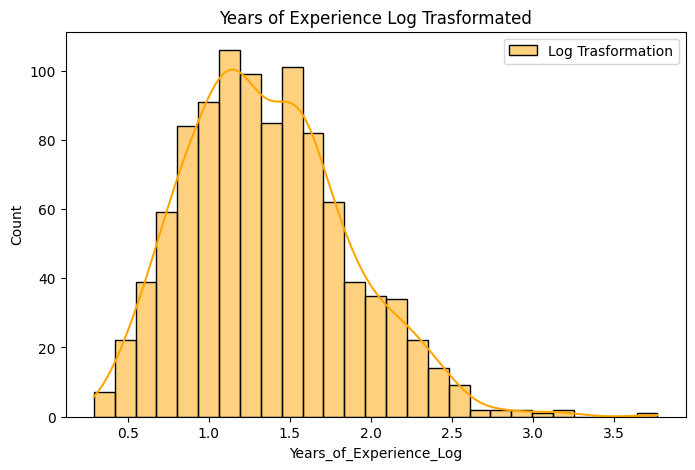

In [15]:
df['Years_of_Experience_Log'] = np.log1p(df['Years_of_Experience'])

#visualizing the transformarion
plt.figure(figsize=(8,5))
sns.histplot(df['Years_of_Experience_Log'], kde=True, label='Log Trasformation', color = 'orange')
plt.legend()
plt.title('Years of Experience Log Trasformated')
plt.show()


# Introduction to Probability

Probability is a branch of mathematics that measures the likelihood or chance of an event occurring. It quantifies uncertainty and is expressed as a number between 0 and 1.

Key Concepts:
- **Experiment**: A process or action that produces outcomes, such as rolling a die or flipping a coin. Random (with more than one possible outcome, otherwise deterministic) experiments are often conducted repeatedly (ex. rolling a die 2 times), in which case the individual repetitions are called trials.
- **Outcome**: A possible result of an experiment, e.g., rolling a 3 twice on a die.
- **Sample Space**: The set of all possible outcomes of an experiment. For example, for rolling a six-sided die once: {1, 2, 3, 4, 5, 6}; for rolling a six-sided die twice there are 36 possible outcomes: {(1, 1), (1, 2), ...}
- **Event**: A subset of the sample space, representing one or more outcomes. For instance, when rolling a six-sided die once, {2, 4, 6} is the event "rolling an even number".

La probabilità è una branca della matematica che misura la probabilità o la possibilità che un evento si verifichi. Quantifica l'incertezza ed è espressa come un numero compreso tra 0 e 1.

Concetti chiave:

- Esperimento: un processo o un'azione che produce risultati, come lanciare un dado o una moneta. Gli esperimenti casuali (con più di un possibile risultato, altrimenti deterministici) vengono spesso condotti ripetutamente (ad esempio, lanciare un dado 2 volte), nel qual caso le singole ripetizioni sono chiamate prove.
- Risultato: un possibile risultato di un esperimento, ad esempio, lanciare un 3 due volte su un dado.
- Spazio campionario: l'insieme di tutti i possibili risultati di un esperimento. Ad esempio, per lanciare un dado a sei facce una volta: {1, 2, 3, 4, 5, 6}; per lanciare un dado a sei facce due volte ci sono 36 possibili risultati: {(1, 1), (1, 2), ...}
- Evento: un sottoinsieme dello spazio campionario, che rappresenta uno o più risultati. Ad esempio, lanciando una volta un dado a sei facce, {2, 4, 6} è l'evento "tirare un numero pari".

The **theoretical probability** of an event $A$ occurring is given by:  

$$
P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}
$$

The **empirical probability** is calculated from observed data in the context of real-world experimentsa and data:  

$$
P(A) = \frac{\text{Number of times A occurs}}{\text{Total number of trials}}
$$

 il codice simula 100 lanci di moneta e calcola la frazione di volte che il risultato è "Heads". La funzione np.mean(coin_flips == 'Heads') restituirà una probabilità (compresa tra 0 e 1) che rappresenta la frequenza di "Heads" nei 100 lanci simulati.

In [16]:
np.random.seed(42)
coin_flips = np.random.choice(['Heads', 'Tails'], size = 100)

np.mean(coin_flips == 'Heads')

np.float64(0.44)

Il codice restituisce un dizionario che mappa ogni numero del dado (da 1 a 6) alla sua probabilità di apparire, calcolata come la frazione di volte che quel numero è stato lanciato.
Ogni valore è una probabilità che riflette la frequenza di ciascun numero nei 100 lanci simulati. Queste probabilità dovrebbero essere abbastanza vicine a 1/6 (circa 0.167) se il dado è "fair" (giusto) e il numero di lanci è sufficientemente grande.

In [17]:
die_rolls = np.random.choice(range(1,7), size=100)
{i: np.mean(die_rolls == i).item() for i in range(1,7)}

{1: 0.17, 2: 0.15, 3: 0.16, 4: 0.2, 5: 0.18, 6: 0.14}

## Probability rules

- La probabilità di un evento è compresa tra 0 (evento impossibile) e 1 (evento certo)
- La probabilità che un evento non si verifichi (il suo complemento) è: $$
P(A^c) = 1 - P(A)
$$  

  Questo perché la somma di tutti i possibili risultati deve essere uguale a 1.

- La probabilità che si verifichi l'evento $A$ o l'evento $B$ quindi l'unione è: $$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

  SE $A$ e $B$ sono mutuamente esclusivi (non possono verificarsi insieme), allora:  

$$
P(A \cup B) = P(A) + P(B)
$$

- La probabilità che si verifichino entrambi l'evento $A$ o l'evento $B$ quindi l'intersezione è: $$
P(A \cap B) = P(A) \times P(B)
$$

  per **eventi indipendenti** (uno non influenza l'altro) e $$
P(A \cap B) = P(A) \times P(B | A)
$$
  per **eventi dipendenti** (uno influenza l'altro).

  Questo significa che  $P(B) = P(B | A)$ gli eventi $A$ e $B$ sono indipendenti, ovvero il verificarsi di  $B$ non influenza il verificarsi di $A$ e viceversa.

In [18]:
total_cards = 52
red_cards = 26
face_cards = 12
red_and_face_cards = 6

p_not_red = 1 - (red_cards / total_cards)

p_red_or_face = (red_cards / total_cards) + (face_cards / total_cards)

heart_cards = 13
diamonds_cards = 13
p_heart_or_diamonds = (heart_cards / total_cards) + (diamonds_cards / total_cards)

p_two_aces = 4/52 * 3/51

p_ace_two = 4/52 * 4/51


## Conditional probability

La **probabilità condizionata** misura la probabilità che un evento si verifichi, dato che un altro evento è già noto (per ipotesi, prove, ecc.) come verificatosi: $$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

La **Legge della probabilità totale** consente di calcolare la probavilità di un evento $A$ in base alle sue probabilità condizionali, dato un insieme di eventi reciprocamente esclusivi ed esaustivi (almeno uno deve verificarsi) $B_1, B_2, ..., B_n$.

$$P(A) = P(A|B_1)P(B_1)+P(A|B_2)P(B_2)+\cdots+P(A|B_n)P(B_n)=\sum_{i} P(A | B_i)P(B_i)$$

È particolarmente utile quando il calcolo diretto della probabilità di un evento è difficile.

**Il teorema di Bayes** è una formula matematica utilizzata per aggiornare la probabilità di un evento in base a nuove prove. Ci consente di calcolare le probabilità condizionali:

$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}$$







La **probabilità condizionata** è un concetto fondamentale in probabilità che si usa quando vogliamo calcolare la probabilità di un evento, ma con la conoscenza che un altro evento si è già verificato. In altre parole, la probabilità condizionata ci dice quanto è probabile che un evento si verifichi, dato che un altro evento è già accaduto.

Formula della probabilità condizionata
La probabilità condizionata di un evento 
𝐴
, dato che è già accaduto un evento 
𝐵
, è denotata come 
𝑃
(
𝐴
∣
𝐵
)
 e si calcola con la seguente formula:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$
 
Dove:

𝑃
(
𝐴
∣
𝐵
)
 è la probabilità che accada l'evento 
𝐴
, dato che 
𝐵
 è accaduto.
𝑃
(
𝐴
∩
𝐵
)
P(A∩B) è la probabilità che accadano entrambi gli eventi 
𝐴
 e 
𝐵
Bcontemporaneamente (probabilità dell'intersezione di 
𝐴
 e 
𝐵
).
𝑃
(
𝐵
)
 è la probabilità che accada l'evento 
𝐵
 (probabilità di 
𝐵
).
Interpretazione
Numeratore: La probabilità che accadano entrambi gli eventi 
𝐴
 e 
𝐵
, ovvero la probabilità che si verifichino contemporaneamente.
Denominatore: La probabilità che accada l'evento 
𝐵
, cioè l'evento che sappiamo già si è verificato.

La **Legge della probabilità totale** è un concetto fondamentale nella teoria delle probabilità che permette di calcolare la probabilità di un evento, suddividendo il problema in più "scenari" o "partizioni" che coprono tutto lo spazio campionario. Questa legge è particolarmente utile quando l'evento che stiamo cercando di analizzare può essere suddiviso in diverse situazioni più semplici, che sono mutuamente esclusive e collettivamente esaurienti.

In altre parole, la Legge della probabilità totale dice che la probabilità di un evento 

A può essere calcolata sommando le probabilità condizionate di 

A in ciascuna delle partizioni 

B 
i
​
 , pesate per la probabilità di ciascun 

B 
i
​
 .

**Intuizione della Legge della probabilità totale**
Immagina che tu voglia calcolare la probabilità che accada un certo evento 
𝐴
, ma non puoi calcolarlo direttamente, magari perché l'evento dipende da diverse situazioni. La Legge della probabilità totale ti permette di "scomporre" l'evento in più scenari 
𝐵
1
,
𝐵
2
,
…
,
𝐵
𝑛
B 
1
​
 ,B 
2
​
 ,…,B 
n
​
 , ognuno dei quali è un evento che copre un caso specifico. Poi, per ciascun scenario, calcoli la probabilità condizionata di 
𝐴
A dato che si verifica quello scenario, e la moltiplichi per la probabilità che quello scenario accada. Sommi poi tutti questi contributi.

Ora calcolo la probavbilità che piova dato che c'è traffico. 

In [19]:
p_rain = 0.3 #probabilità di pioggia
p_traffic = 0.4 #probabilità di traffico
p_traffic_give_rain = 0.7 #probabilità di traffico dato che piove

p_rain_and_traffic = p_rain * p_traffic_give_rain #probabilità congiunta: probabilità che entrambi gli eventi accadano (che piova e che ci sia traffico)
p_rain_given_traffic = p_rain_and_traffic / p_traffic  #probabilità condizionato: probabilità che piova dato che c'è traffico

In [20]:
p_disease = 0.1 #La probabilità di avere la malattia (prima di fare il test)
p_positive_given_desease = 0.95 #La probabilità di ottenere un test positivo dato che hai la malattia (sensibilità del test)
p_positive_given_no_disease = 0.05 #La probabilità di ottenere un test positivo dato che non hai la malattia (falsi positivi).

# pdisease_given_positive?

#Questa probabilità è la somma delle probabilità che si ottenga un test positivo sia quando si ha la malattia che quando non la si ha
p_positive = (p_positive_given_desease * p_disease) + (p_positive_given_no_disease * (1-p_disease))

#Usiamo il teorema di Bayes per calcolare la probabilità condizionata
p_disease_given_positive = (p_positive_given_desease*p_disease) / p_positive
p_disease_given_positive

0.6785714285714285

# Probability Distributions

Una distribuzione di probabilità è la funzione matematica che descrive le probabilità di accadimento di possibili risultati di un esperimento.

Una **distribuzione di probabilità discreta** è applicabile a scenari in cui l'insieme di possibili risultati è discreto (ad esempio il lancio di una moneta, il lancio di un dado); in questo caso la distribuzione di probabilità discreta è nota come funzione di massa di probabilità. D'altro canto, le ***distribuzioni di probabilità continue** sono applicabili a scenari in cui l'insieme di possibili risultati può assumere valori in un intervallo continuo (ad esempio numeri reali), come la temperatura in un dato giorno. Nel caso continuo, le probabilità sono descritte da una funzione di densità di probabilità e la distribuzione di probabilità è per definizione l'integrale della funzione di densità di probabilità.

Il **valore atteso** è un concetto nella teoria della probabilità e nella statistica che rappresenta il risultato medio di una variabile casuale, ponderato dalla probabilità di tali risultati. Pertanto, è una media ponderata di tutti i possibili risultati.

**Distribuzione di probabilità discreta**:

- Gli eventi possibili sono finiti o numerabili.
- La probabilità di ogni evento è un numero compreso tra 0 e 1.
- Il valore atteso è la media ponderata dei valori possibili.

**Distribuzione di probabilità continua**:

- Gli eventi possibili formano un intervallo continuo.
- La probabilità di un singolo valore è zero, ma possiamo calcolare la probabilità di un intervallo di valori.
- Il valore atteso è calcolato come l'integrale della funzione di densità di probabilità.

**Valore atteso**:

- È la media ponderata dei valori possibili per una variabile casuale.
- Per le variabili discrete, si calcola come somma dei valori moltiplicati per le loro probabilità.
- Per le variabili continue, si calcola tramite un'integrazione della funzione di densità.

### DISTRIBUZIONE DI BERNOULLI
La distribuzione di Bernoulli è una delle distribuzioni di probabilità più semplici e fondamentali nella teoria delle probabilità e statistica. È utilizzata per modellare esperimenti che hanno solo due possibili risultati: successo o fallimento.

CARATTERISTICHE PRINCIPALI
- Un esperimento di Bernoulli è un esperimento binario, cioè può risultare in uno di due esiti: successo (ad esempio "test positivo", "testa" su una moneta, "vince" in una gara) o fallimento (ad esempio "test negativo", "croce" su una moneta, "perde" in una gara).
- La distribuzione di Bernoulli è descritta da un parametro 
𝑝
p, che rappresenta la probabilità di successo (ovvero la probabilità che si verifichi l'esito di successo). La probabilità di fallimento sarà quindi 
1
−
𝑝
1−p.

ASPETTI IMPORTANTI
- Valori possibili: 
X può solo assumere i valori 0 o 1 (fallimento o successo).
- Media (o aspettativa): La media di una distribuzione di Bernoulli è E(X)=p. Quindi, se si ripete l'esperimento molte volte, la probabilità media di ottenere un successo è p.
- Varianza: La varianza di una distribuzione di Bernoulli è Var(X)=p(1−p). Questo misura la dispersione dei valori attorno alla media.


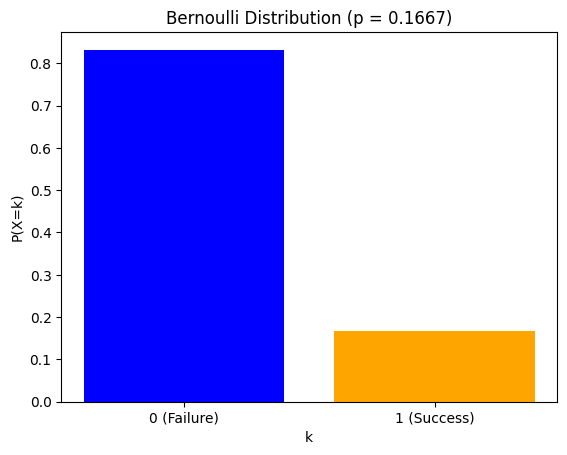


Expected value: 0.17
Variance: 0.14


In [21]:
n = 1
p = 1/6 # success is rolling '3'

experiment_repetitions = 1000
bernoulli_trials = np.random.binomial(n, p, size=experiment_repetitions)

expected_value = p
variance = p * (1-p)

# Visualizing the distribution
unique, counts = np.unique(bernoulli_trials, return_counts=True)
plt.bar(unique, counts/np.sum(counts), color=['blue', 'orange'])
plt.xticks([0, 1], ['0 (Failure)', '1 (Success)'])
plt.title(f"Bernoulli Distribution (p = {p:.4f})")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

print(f"\nExpected value: {expected_value:.2f}")
print(f"Variance: {variance:.2f}")

### DISTRIBUZIONE BINOMIALE
La distribuzione binomiale è una distribuzione di probabilità discreta che descrive il numero di successi in una sequenza di esperimenti di Bernoulli indipendenti e identici. È uno dei concetti fondamentali della teoria delle probabilità e viene utilizzata quando si ripete un esperimento con due esiti possibili (successo o fallimento) per un numero definito di volte.

CARATTERISTICHE PRINCIPALI
- Numero di esperimenti (n): La distribuzione binomiale riguarda esperimenti ripetuti un numero fisso di volte. Ogni esperimento ha due risultati possibili: successo o fallimento.
- Probabilità di successo (p): Ogni esperimento ha una probabilità di successo p (e una probabilità di fallimento 1−p).
- Indipendenza degli esperimenti: Ogni esperimento è indipendente dagli altri. Il risultato di un esperimento non influisce sugli altri esperimenti.
- Variabile casuale: La variabile casuale X che segue una distribuzione binomiale rappresenta il numero di successi che si verificano nei n esperimenti.

PARAMETRI DELLA DISTRIBUZIONE
- Media (o aspettativa): La media della distribuzione binomiale è la probabilità attesa di successi in n esperimenti. Si calcola come:   E(X)=n*p
- Varianza: La varianza misura quanto i risultati di X sono dispersi attorno alla media. La varianza della distribuzione binomiale è:   Var(X) = n*p*(1-p)
- Deviazione standard: La deviazione standard è la radice quadrata della varianza ed è una misura della dispersione dei risultati

La distribuzione binomiale è utile quando si desidera calcolare la probabilità di un certo numero di successi in un numero fisso di esperimenti indipendenti, dove ogni esperimento ha solo due esiti possibili. È caratterizzata da due parametri principali: il numero di esperimenti n e la probabilità di successo p in ogni singolo esperimento. La distribuzione binomiale viene applicata in molti ambiti, come sondaggi, analisi di qualità, giochi di probabilità e altro.

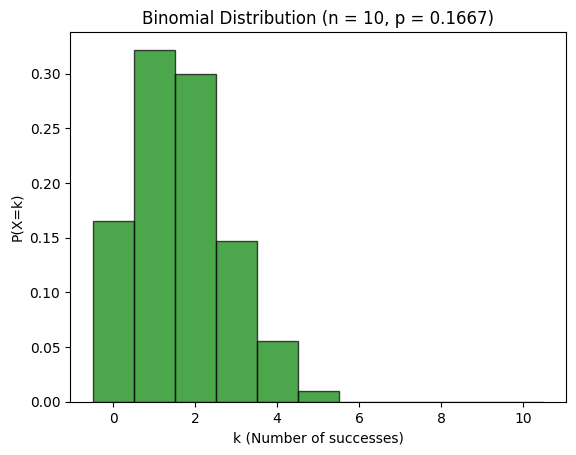


Expected value: 1.67
Variance: 1.39


In [22]:
n = 10
p = 1/6 # success is rolling '3'

experiment_repetitions = 1000
binomial_experiments = np.random.binomial(n, p, size=experiment_repetitions)

expected_value = n * p
variance = n * p * (1-p)

# Visualizing the distribution
plt.hist(binomial_experiments, bins=range(0, n+2), density=True, align='left', color='green', alpha=0.7, edgecolor='black')
plt.title(f"Binomial Distribution (n = {n}, p = {p:.4f})")
plt.xlabel("k (Number of successes)")
plt.ylabel("P(X=k)")
plt.show()

print(f"\nExpected value: {expected_value:.2f}")
print(f"Variance: {variance:.2f}")

### DISTRIBUZIONE DI POISSON
La distribuzione di Poisson è una distribuzione di probabilità discreta che descrive il numero di eventi che si verificano in un intervallo di tempo o spazio, dato che gli eventi si verificano con una certa frequenza media costante e in modo indipendente tra loro. È spesso utilizzata per modellare fenomeni come il numero di chiamate che riceve una centrale telefonica in un'ora, il numero di auto che passano attraverso un casello autostradale in un giorno, o il numero di incidenti stradali in un mese.

CARATTERISTICHE PRINCIPALI
- La distribuzione di Poisson è definita da un parametro λ (lambda), che rappresenta la frequenza media degli eventi per unità di tempo o spazio. Ad esempio, se λ=3, significa che ci aspettiamo in media 3 eventi in un dato intervallo di tempo (o spazio)
- Gli eventi sono indipendenti tra loro, cioè la probabilità che un evento si verifichi in un dato intervallo non dipende dal numero di eventi che si sono verificati in intervalli precedenti.
- La distribuzione di Poisson è particolarmente utile quando il numero di eventi che possono verificarsi in un dato intervallo è grande e il tasso medio di eventi λ è relativamente piccolo.

PARAMETRI DELLA DISTRIBUZIONE
- Media: La media di una variabile casuale **X** che segue una distribuzione di Poisson è **E(X)=λ**. Questo significa che, in media, ci si aspetta che si verifichino λ eventi nell'intervallo osservato
- Varianza: La varianza della distribuzione di Poisson è anch'essa pari a λ, ovvero **Var(X)=λ**. Questo implica che la dispersione intotno alla media è uguale al tasso medio di eventi.
- Indipendenza. gli eventi sono considerati indipendenti, il che significa che il verificarsi di un evento non influisce sul verificarsi di un altro

SOMMARIO
La distribuzione di Poisson è utile per modellare il numero di eventi che si verificano in un intervallo di tempo o spazio, quando gli eventi sono rari, indipendenti e avvengono con una frequenza media costante. È completamente definita dal parametro λ, che rappresenta la frequenza media degli eventi, ed è applicata in vari ambiti come telecomunicazioni, scienze sociali, ingegneria e fisica.

distribuzione usata quando si hanno dei valori di conteggio

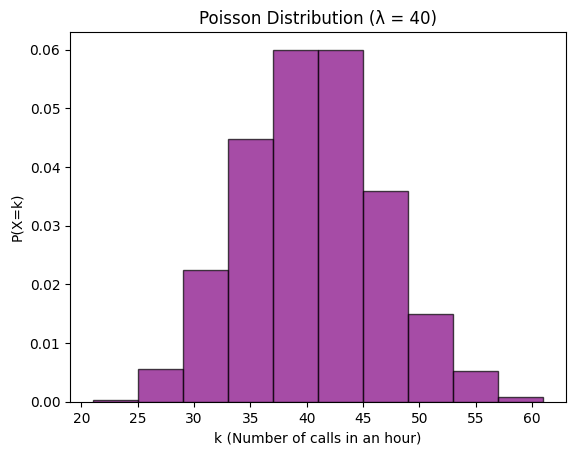


Expected value: 40.00
Variance: 40.00


In [23]:
lambda_ = 40

experiment_repetitions = 1000
poisson_experiments = np.random.poisson(lambda_, size=experiment_repetitions)

expected_value = lambda_
variance = lambda_

plt.hist(poisson_experiments, density=True, color='purple', alpha=0.7, edgecolor='black')
plt.title(f"Poisson Distribution (λ = {lambda_})")
plt.xlabel("k (Number of calls in an hour)")
plt.ylabel("P(X=k)")
plt.show()

print(f"\nExpected value: {expected_value:.2f}")
print(f"Variance: {variance:.2f}")

### DISTRIBUZIONE DISCRETA UNIFORME
La distribuzione uniforme discreta è una distribuzione di probabilità discreta in cui tutti gli esiti di un esperimento hanno la stessa probabilità di verificarsi. È uno dei modelli più semplici per descrivere variabili casuali discrete. Nella distribuzione uniforme discreta, ogni risultato in un insieme di valori possibili ha la stessa probabilità di essere scelto.

CARATTERISTICHE PRINCIPALI
- L'insieme dei valori possibili per la variabile casuale X è finito e contiene n possibili risultati possibili
- Ogni valore nell'insieme ha la stessa probabilità di essere osservato.

PARAMETRI DELLA DISTRIBUZIONE
- MEDIA(ASPETTATIVA): La media di una distribuzione uniforme discreta è il valore atteso di X **E(X==(a+b)/2**
- VARIANZA: La varianza misura quanto i risultati si discostano dalla media
  

### DISTRIBUZIONE CONTINUA UNIFORME
La distribuzione continua uniforme è un tipo di distribuzione di probabilità in cui ogni intervallo di valori, all'interno di un certo intervallo di numeri, ha la stessa probabilità di essere scelto.
In altre parole, in una distribuzione uniforme continua, ogni valore all'interno di un determinato intervallo [a,b] ha la stessa probabilità di essere osservato. La funzione di densità di probabilità (PDF) è costante all'interno di questo intervallo.

CARATTERISTICHE PRINCIPALI
- Intervallo di definizione: La distribuzione uniforme continua è definita su un intervallo [a,b] dove a è il valore minimo e b il valore massimo. qui a≤x≤b.
- Funzione di densità di probabilità (PDF): La funzione di densità di probabilità della distribuzione uniforme continua è data da:
**f(x)=1/(b-a)** , per a≤x≤b
fuori da questo intervallo, la probavilità è zero (cioè **f(x)=0** , per x<a o x>b)
- La MEDIA (μ) della distribuzione uniforme continua è:  ** μ = (a+b)/2 **
- La varianza (σ^2) è: **σ^2=[(b-a)^2]/12**
- Proprietà: La probabilità che un valore x si trovi all'interno di un intervallo [x1, x2] all'interno di [a, b] può essere calcolata come la lunghezza dell'intervallo [a, b]. cioè:
 **P(x1 < X < x2) = (x1 - x2)/ (b - a)** con x1<x2 e a<x1, x2<b




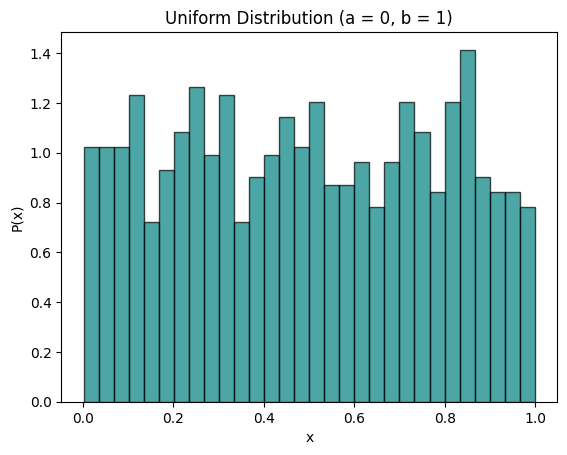

In [24]:
a, b = 0, 1

n_values = 1000
uniform_values = np.random.uniform(low=a, high=b, size=n_values)

expected_value = (a + b) / 2

plt.hist(uniform_values, bins=30, density=True, color='teal', alpha=0.7, edgecolor='black')
plt.title(f"Uniform Distribution (a = {a}, b = {b})")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.show()

The **exponential** distribution is the continuous probability distribution of the distance between events in a Poisson process, i.e. events that occur continuously and independently at a constant average rate (the rate is the probability per unit time).

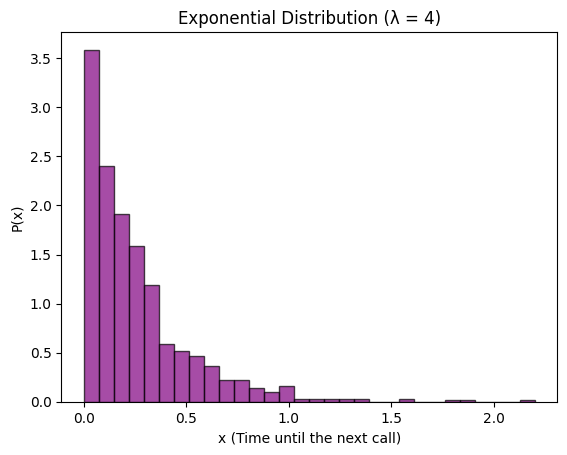

In [25]:
lambda_ = 4 # rate
n_values = 1000

exponential_values = np.random.exponential(scale=1/lambda_, size=n_values)

expected_value = 1/lambda_

plt.hist(exponential_values, density=True, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title(f"Exponential Distribution (λ = {lambda_})")
plt.xlabel("x (Time until the next call)")
plt.ylabel("P(x)")
plt.show()

The **normal** distribution is a continuous probability symmetric distribution, characterized by its bell-shaped curve, where most of the values cluster around the mean.

molte cose del mondo reale si modellano con la normale. molti metodi statistici assumono normalità. Nella distribuzione normale la media=moda=mediana

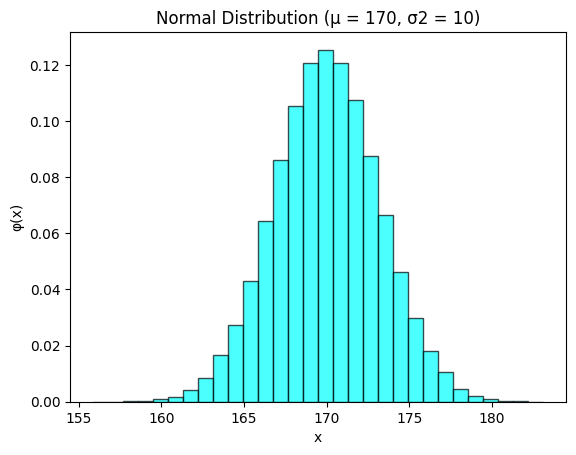

In [26]:
mu, sigma_2 = 170, 10

n_values = 100000
normal_values = np.random.normal(loc=mu, scale=sigma_2**0.5, size=n_values)

expected_value = mu
variance = sigma_2

plt.hist(normal_values, density=True, bins=30, color='cyan', alpha=0.7, edgecolor='black')
plt.title(f"Normal Distribution (μ = {mu}, σ2 = {sigma_2})")
plt.xlabel("x")
plt.ylabel("φ(x)")
plt.show()

# Inferential Statistics




**Inferential statistical** infers properties of a population, for example by testing hypotheses and estimating population parameters (e.g. the mean). It is assumed that the observed data set is sampled from a larger population.

Descriptive statistics on the other hand is only concerned with properties of the observed data, and it does not assume that the data come from a larger population.

**La statistica inferenziale** deduce le proprietà di una popolazione, ad esempio testando ipotesi e stimando parametri della popolazione (ad esempio la media). Si presume che il set di dati osservato sia campionato da una popolazione più ampia.

La statistica descrittiva, d'altro canto, si occupa solo delle proprietà dei dati osservati e non presuppone che i dati provengano da una popolazione più ampia.

## Sampling

A **statistical population** refers to a set of similar items or events which is of interest for some question or experiment. It can be real (e.g. male US citizens) or hypothetical (e.g. the set of all possible hands in a game of poker).

**Sampling** is the selection of a subset (statistical sample) from a statistical population in order to estimate characteristics about the whole population.

The goal is to gather a representative sample, i.e. one that is able to reflect the whole population.

La statistica inferenziale deduce le proprietà di una popolazione, ad esempio testando ipotesi e stimando parametri della popolazione (ad esempio la media). Si presume che il set di dati osservato sia campionato da una popolazione più ampia.

La statistica descrittiva, d'altro canto, si occupa solo delle proprietà dei dati osservati e non presuppone che i dati provengano da una popolazione più ampia.

L'obiettivo è quello di raccogliere un campione rappresentativo, cioè in grado di riflettere l'intera popolazione.

Expected Value (Population Mean): 100.08
Sample Mean: 99.47


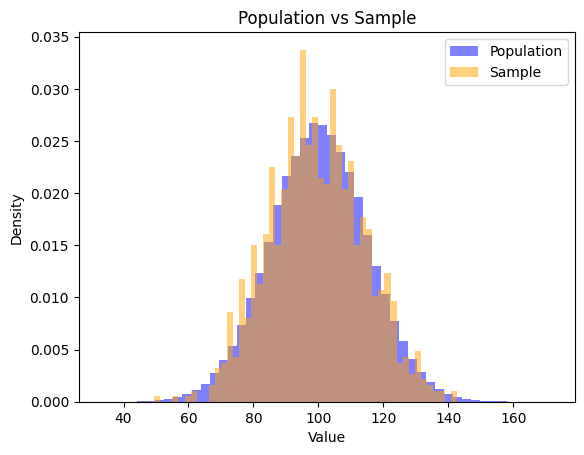

In [27]:
population = np.random.normal(loc=100, scale=15, size=100000)

sample_size = int(0.01 * len(population))
sample = np.random.choice(population, size=sample_size, replace=False)

plt.hist(population, bins=50, alpha=0.5, label='Population', color='blue', density=True)
plt.hist(sample, bins=50, alpha=0.5, label='Sample', color='orange', density=True)
plt.title("Population vs Sample")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

expected_value = np.mean(population)
sample_mean = np.mean(sample)

print(f"Expected Value (Population Mean): {expected_value:.2f}")
print(f"Sample Mean: {sample_mean:.2f}")

## Law of Large Numbers

The law of large numbers states that given a large sample of independent and identically distributed values, the sample mean converges to the true mean (expected value).

All'aumentare della grandezza del campione la media della distribuzione campionaria si avvicinerà sempre di puù alla media della popolazione



In [28]:
np.random.seed(1)

p=0.5
n_trials = 10000

results = np.random.choice([0, 1], size = n_trials)
cumulative_mean = np.cumsum(results) / np.arange(1, n_trials +1)

results

array([1, 1, 0, ..., 1, 0, 1], shape=(10000,))

## Monte Carlo methods

I metodi Monte Carlo sono una classe di algoritmi computazionali che si basano su campionamenti casuali ripetuti per ottenere risultati numerici. Sono un buon esempio della legge dei grandi numeri, perché maggiore è il numero di ripetizioni, migliore tende a essere l'approssimazione. Sono spesso implementati tramite simulazioni al computer.

Servono per far vedere gli effetti della legge dei grandi numeri.
Provo a simulare un gioco di roulette

In [29]:
#European roulet: 37 slots (0 to 36)

#always bet on black
#initial bet 1€

def roulette_spin():
    wheel = [i for i in range (0, 37)]
    results = np.random.choice(wheel)
    return result

def play_roulette_game(n_spins):

    balance = 0
    bet = 1

    for _ in range (n_spins):
        result = roulette_spun()

## Central Limit Theorem

Il **Teorema del limite centrale** (CLT) afferma che la distribuzione delle medie campionarie si avvicinerà a una distribuzione normale all'aumentare della dimensione del campione (solitamente 30 è sufficiente), indipendentemente dalla forma di distribuzione della popolazione originale.

Ciò significa che se prendessimo molti campioni casuali di dimensione $n$ da una popolazione qualsiasi e ne calcolassimo le medie, la distribuzione di tali medie sarà:
approssimativamente normale, centrata sulla vera media della popolazione $\mu$ e con una deviazione standard data da $\frac{\sigma}{\sqrt{n}}$, dove $\sigma$ è la deviazione standard della popolazione.

la distribuzione normale è cosi importante in statistica per questo teorema. Possiamo avere una qualsiasi distribuzione anche non norale, se noi dalla distribuzione estraiamo casualmente dei valori e calcoliamo la distribuzione delle medie campionarie questa si distribuisce normalmente.

questo teorema vale solo per le medie non per gli altri parametri.

In [30]:
sample_size = 1000
sample_means = [np.mean(np.random.uniform(1, 100, sample_size)) for _ in range (10000)]

## Standard Errors and Confidence Intervals

L'**Errore Standard** (SE) misura la variabilità di una statistica campionaria rispetto al parametro della popolazione reale. Riflette quanto varierebbe la statistica campionaria se campioni diversi fossero estratti dalla stessa popolazione.

È definito come la deviazione standard della distribuzione campionaria della statistica. Dal CLT sappiamo che le medie campionarie seguono una distribuzione normale con deviazione standard $\frac{\sigma}{\sqrt{n}}$, che è quindi l'errore standard per la media campionaria).

misura di quanto varia una statistica che noi ricaviamo da un campione. molto spesso questa statistica sarà la media. è una misura che indica quanto varierebbe la stima di un paramentro se noi estraessimo tanti campioni. Nella pratica non si può avere accesso a tanti campioni. 

la variabilità dipende dal campione, più il campione è piccolo più la standard deviation sarà grnade. più il campione è piccolo più avro variabilità

In [31]:
np.random.seed(42)

population = np.random.normal(loc=100, scale= 15, size=100000)

def compute_mean_se(sample_size):
    sample = np.random.choice(population, size= sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    standard_error = sample_std / np.sqrt(sample_size)
    return sample_mean, standard_error

sample_size = [10, 100, 1000, 10000]

for size in sample_size:
    mean, se = compute_mean_se(size)
    print(f"Sample size: (size) | Sample Mean: {mean:.2f} | Standard Error: {se:.2f}")

Sample size: (size) | Sample Mean: 98.61 | Standard Error: 4.58
Sample size: (size) | Sample Mean: 101.15 | Standard Error: 1.50
Sample size: (size) | Sample Mean: 100.17 | Standard Error: 0.50
Sample size: (size) | Sample Mean: 100.12 | Standard Error: 0.15


L'errore standard funge da componente cruciale nel calcolo degli **intervalli di confidenza**, che forniscono un intervallo di valori plausibili per un parametro della popolazione, con un livello di confidenza specificato. Un intervallo di confidenza viene calcolato dai dati. Diversi campioni casuali estratti dalla stessa popolazione producono diversi intervalli di confidenza. Il livello di confidenza è la proporzione di CI che, all'aumentare del numero di campioni, contengono teoricamente il valore reale del parametro.

In generale, l'intervallo di confidenza per la stima di un parametro $\theta$ è dato da:
$$
\left[ \widehat{\theta} - c_{\alpha} \times \text{SE}(\widehat{\theta}), \quad \widehat{\theta} + c_{\alpha} \times \text{SE}(\widehat{\theta}) \right]
$$
dove $c_{\alpha}$ è il valore critico di una distribuzione statistica rilevante. Il valore critico è il punto sulla distribuzione di probabilità che corrisponde al livello di confidenza desiderato. Rappresenta il numero di deviazioni standard dalla media che cattura la percentuale specificata dei dati. Il valore critico viene moltiplicato per l'errore standard della statistica campionaria per calcolare il margine di errore, che definisce quanto sarà ampio o stretto l'intervallo di confidenza.

La scelta della distribuzione statistica dipende dalla distribuzione campionaria sottostante della statistica che viene stimata. Sappiamo che per campioni di grandi dimensioni la distribuzione delle medie campionarie è approssimativamente normale, anche quando la distribuzione della popolazione non lo è: ecco perché gli intervalli di confidenza per la media utilizzano valori z (valori critici da una distribuzione normale).

In [32]:
import scipy.stats as stats

population = np.random.normal(loc=100, scale=15, size=100000)

sample_size = 100000
sample = np.random.choice(population, size=sample_size, replace=False)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
standard_error = sample_std / np.sqrt(sample_size)

confidence_level = 0.95
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * standard_error
ci_lower, ci_upper = sample_mean - margin_of_error, sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Sample Mean: 99.98
95% Confidence Interval: (99.88, 100.07)


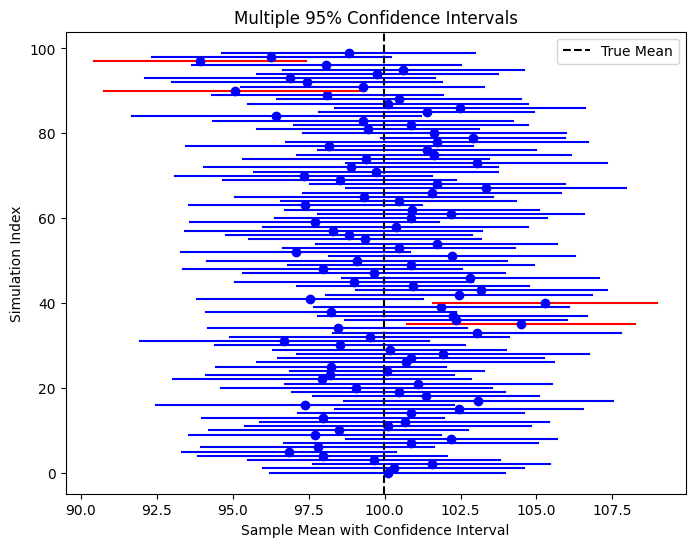

In [33]:
n_simulations = 100  # Number of confidence intervals to generate
sample_size = 50
true_mean = np.mean(population)

plt.figure(figsize=(8, 6))

for i in range(n_simulations):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    standard_error = np.std(sample, ddof=1) / np.sqrt(sample_size)
    margin_of_error = z_critical * standard_error
    ci_lower, ci_upper = sample_mean - margin_of_error, sample_mean + margin_of_error

    # Plot each confidence interval
    plt.plot([ci_lower, ci_upper], [i, i], color='blue' if (ci_lower <= true_mean <= ci_upper) else 'red')
    plt.plot(sample_mean, i, 'bo')  # Sample mean point

# Plot the true population mean as a vertical line
plt.axvline(true_mean, color='black', linestyle="--", label="True Mean")
plt.xlabel("Sample Mean with Confidence Interval")
plt.ylabel("Simulation Index")
plt.title("Multiple 95% Confidence Intervals")
plt.legend()
plt.show()

## Bootstrap

Il bootstrap è un metodo di ricampionamento utilizzato per stimare la distribuzione di una statistica estraendo ripetutamente campioni con sostituzione dai dati originali.

Il bootstrap non richiede ipotesi sulla distribuzione dei dati, il che lo rende utile per dati non normali (o in generale quando la distribuzione è complessa/sconosciuta). Fornisce inoltre stime migliori rispetto ai metodi teorici tradizionali quando la dimensione del campione è piccola.

Può essere utilizzato, ad esempio, per costruire intervalli di confidenza e stimare l'errore standard di una statistica quando i metodi tradizionali non sono applicabili.

In [34]:
np.random.seed(42)

lambda_param = 1 / 3
data = np.random.exponential(scale=1/lambda_param, size=100)

def bootstrap_resample(data, statistic_func, n_bootstrap_samples):
    bootstrap_stats = []
    n = len(data)
    for _ in range(n_bootstrap_samples):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrap_stats.append(statistic_func(sample))
    return np.array(bootstrap_stats)

n_bootstrap_samples = 10000
bootstrap_medians = bootstrap_resample(data, np.median, n_bootstrap_samples)

standard_error = np.std(bootstrap_medians)
ci_lower = np.percentile(bootstrap_medians, 2.5)
ci_upper = np.percentile(bootstrap_medians, 97.5)

print(f"Bootstrap Standard Error: {standard_error:.3f}")
print(f"95% Bootstrap Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

Bootstrap Standard Error: 0.345
95% Bootstrap Confidence Interval: [1.193, 2.520]


## Hypothesis Testing

Un test di ipotesi statistica è un metodo di inferenza statistica che verifica se i dati supportano sufficientemente una particolare ipotesi. In particolare, aiuta a determinare se un effetto osservato è statisticamente significativo o se avrebbe potuto verificarsi per caso.

Per prima cosa, definiamo le ipotesi nulla e alternativa. In genere, l'ipotesi alternativa $H_a$ postula semplicemente che l'ipotesi nulla $H_0$ non è valida. Per trovare prove a favore o contro l'ipotesi nulla, dobbiamo calcolare una statistica di test T. Il modo in cui costruiamo T dipende dalla natura dell'ipotesi nulla che stiamo testando. Il valore p è definito come la probabilità di osservare una statistica di test uguale o più estrema della statistica osservata, nell'ipotesi che $H_0$ sia vera. Pertanto, un piccolo valore p fornisce prove per rifiutare $H_0$. I valori tipici per rifiutare $H_0$ sono 0,05 e 0,01.

Un test unilaterale cerca la significatività statistica solo su una coda della distribuzione e quindi in genere inquadriamo le nostre ipotesi nulle e alternative usando disuguaglianze.

In un test bilaterale, inquadriamo le ipotesi nulle e alternative in una struttura "uguale" e "non uguale". Ciò significa che distribuiamo la nostra soglia di significatività statistica del valore p a entrambe le code, non solo a una. Ciò significa che il test bilaterale rende più difficile rifiutare l'ipotesi nulla e richiede prove più forti per superare un test.

Esistono numerosi tipi di test di significatività, a seconda del tipo di dati, di quanti campioni ci sono e di cosa viene misurato. Uno molto comune è il t-test, utilizzato per i test di confronto in cui i dati sono numerici.

Failed to reject H0


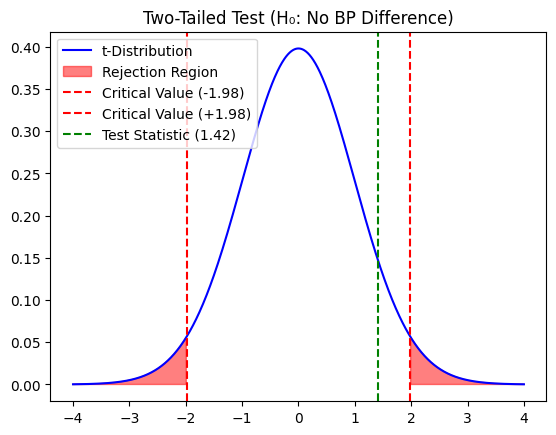

In [35]:
np.random.seed(42)

sample_size = 50

# H0: the treatment has no effect on blood pressure
# H1: the treatment has effect on blood pressure

placebo_group = np.random.normal(loc=120, scale=10, size=sample_size)
treatment_group = np.random.normal(loc=115, scale=10, size=sample_size)

t_stat, p_value = stats.ttest_ind(placebo_group, treatment_group)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

x = np.linspace(-4, 4, 1000)
pdf = stats.t.pdf(x, df=len(placebo_group) + len(treatment_group) - 2)  # t-distribution

# Critical values
t_critical_two_tailed = stats.t.ppf(1 - alpha / 2, df=len(placebo_group) + len(treatment_group) - 2)

# Plot two-tailed test
plt.plot(x, pdf, label="t-Distribution", color="blue")
plt.fill_between(x, pdf, where=(x <= -t_critical_two_tailed) | (x >= t_critical_two_tailed),
                 color="red", alpha=0.5, label="Rejection Region")
plt.axvline(-t_critical_two_tailed, color="red", linestyle="--", label=f"Critical Value (-{t_critical_two_tailed:.2f})")
plt.axvline(t_critical_two_tailed, color="red", linestyle="--", label=f"Critical Value (+{t_critical_two_tailed:.2f})")
plt.axvline(t_stat, color="green", linestyle="--", label=f"Test Statistic ({t_stat:.2f})")
plt.title("Two-Tailed Test (H₀: No BP Difference)")
plt.legend()

Failed to reject H0


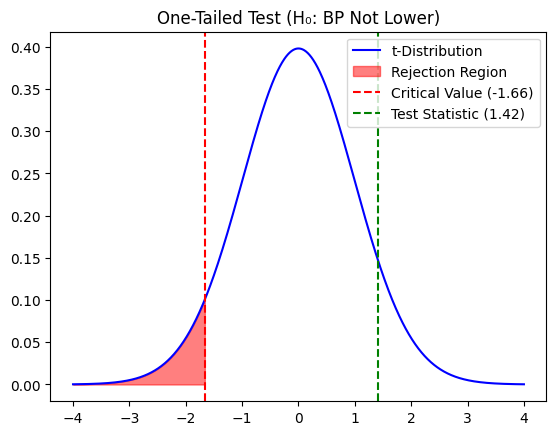

In [36]:
p_value_one_tailed = p_value / 2

alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

t_critical_one_tailed = stats.t.ppf(1 - alpha, df=len(placebo_group) + len(treatment_group) - 2)

plt.plot(x, pdf, label="t-Distribution", color="blue")
plt.fill_between(x, pdf, where=(x <= -t_critical_one_tailed), color="red", alpha=0.5, label="Rejection Region")
plt.axvline(-t_critical_one_tailed, color="red", linestyle="--", label=f"Critical Value ({-t_critical_one_tailed:.2f})")
plt.axvline(t_stat, color="green", linestyle="--", label=f"Test Statistic ({t_stat:.2f})")
plt.title("One-Tailed Test (H₀: BP Not Lower)")
plt.legend()

Se rifiutiamo erroneamente $H_0$ quando è vero, abbiamo un errore di Tipo I. Se non rifiutiamo $H_0$ quando è falso, abbiamo un errore di Tipo II. La potenza del test di ipotesi è definita come la probabilità di non commettere un errore di Tipo II dato che $H_a$ è vero, ovvero la probabilità di rifiutare correttamente $H_0$.

In [37]:
import statsmodels.stats.power as smp

# Power analysis for t-test
effect_size = 0.5  # Medium effect size
alpha = 0.05
power = 0.8

# Compute required sample size
sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
sample_size_one_sided = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')

print(f"Required sample size for 80% power: {sample_size:.0f}")
print(f"Required sample size for 80% power in the one-sided case: {sample_size_one_sided:.0f}") 

Required sample size for 80% power: 64
Required sample size for 80% power in the one-sided case: 50


La procedura statistica che verifica una differenza statisticamente significativa tra più gruppi è chiamata analisi della varianza, o ANOVA. Proprio come il test t può essere utilizzato per confrontare la media di due gruppi, esiste un test statistico per l'ANOVA basato sulla statistica F.

In un'ANOVA "unidirezionale", abbiamo un fattore (gruppo) che varia.

In [38]:
np.random.seed(42)

diet_1 = np.random.normal(loc=5, scale=2, size=30)
diet_2 = np.random.normal(loc=6, scale=2, size=30)
diet_3 = np.random.normal(loc=7, scale=2, size=30)

f_stat, p_value_anova = stats.f_oneway(diet_1, diet_2, diet_3)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value_anova:.3f}")

ANOVA F-statistic: 12.210, p-value: 0.000


Il test del chi-quadrato viene utilizzato con i dati di conteggio per verificare quanto si adattino a una distribuzione prevista. L'uso più comune è con le tabelle di contingenza, per valutare se l'ipotesi nulla di indipendenza tra le variabili è ragionevole.

La teoria statistica asintotica mostra che la distribuzione della statistica del chi-quadrato può essere approssimata da una distribuzione del chi-quadrato.

In [39]:
from scipy.stats import chi2_contingency

observed = np.array([[50, 30],
                     [20, 60]])

# male: 50 voted A, 30 voted B
# female: 20 voted A, 60 voted B

chi2, p_value, _, _, = chi2_contingency(observed)

# Interpret results
if p_value < 0.05:
    print("Reject H₀: There is a significant association between gender and voting preference.")
else:
    print("Fail to reject H₀: No significant association detected.")

Reject H₀: There is a significant association between gender and voting preference.


# Correlation

## Linear vs Monotonic Correlation

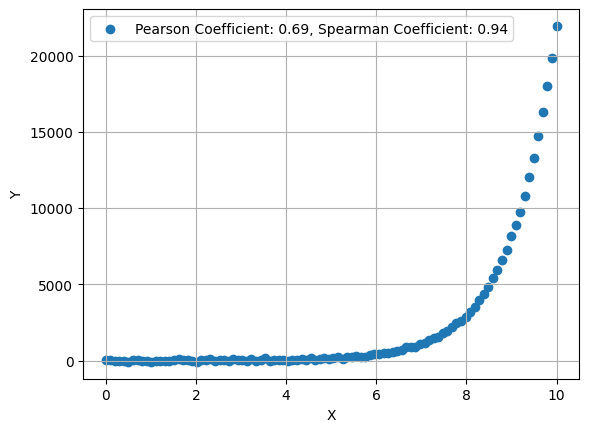

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Create a dataset with a monotonic but non-linear relationship
x = np.linspace(0, 10, 100)
y = np.exp(x) + np.random.normal(0, 50, size=len(x))  # Exponential relationship with noise

# Calculate Pearson and Spearman coefficients
pearson_coeff, _ = pearsonr(x, y)
spearman_coeff, _ = spearmanr(x, y)

# Plot the data
plt.scatter(x, y, label=f'Pearson Coefficient: {pearson_coeff:.2f}, Spearman Coefficient: {spearman_coeff:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Exercises

1) Write a Python function that determines if the distribution of a pandas Series is symmetric, right-skewed or left-skewed.

2) A disease affects 2% of a population. The population is divided into three age groups:
	•	Young (50%): False positive rate 3%, sensitivity 95%.
	•	Middle-aged (30%): False positive rate 4%, sensitivity 90%.
	•	Elderly (20%): False positive rate 5%, sensitivity 85%.

N.B.
False positive rate: probability of a person testing positive when they do not have the disease.
Sensitivity/True positive rate: probability of a person testing positive when they have the disease.

If a random person from the population tests positive, what is the probability they actually have the disease?

# ESERCIZIO 1

In [41]:
#NON è OK la funzione si basa solo sul conteggio dei valori a destra e a sinistra della media. Tuttavia, una distribuzione potrebbe essere asimmetrica anche se la media non è perfettamente al centro, quindi una semplice comparazione dei valori che sono a destra e a sinistra della media potrebbe non essere sufficiente per determinare correttamente la simmetria.
def analizza_simmetria(series):
    # Calcola la media
    media = series.media()
    
    # Conta i valori a destra e a sinistra della media
    destra = sum(series > media)
    sinistra = sum(series < media)
    
    # Se i valori a destra e sinistra sono uguali, è simmetrica
    if destra == sinistra:
        return "Simmetrica"
    
    # Altrimenti, determina quale lato ha più valori
    elif destra > sinistra:
        return "Asimmetrica verso destra"
    else:
        return "Asimmetrica verso sinistra"


In [42]:
 #questo è ok!
def analizza_simmetria_senza_skew(series):
    # Calcola la media e la mediana
    media = series.mean()
    mediana = series.median()
    
    # Determina la simmetria in base alla relazione tra media e mediana
    if abs(media - mediana) < 0.05 * media:  # Considera simmetrica se la differenza è piccola
        return "Simmetrica"
    elif media > mediana:
        return "Asimmetrica verso destra"
    else:
        return "Asimmetrica verso sinistra"


In [43]:
# Creiamo un esempio di serie
data = {'Years_of_Experiences': [1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 7, 8, 9, 10, 13, 19, 25, 25, 26, 26, 29]}
df = pd.DataFrame(data)

# Usa la funzione per determinare la simmetria
risultato = analizza_simmetria_senza_skew(df['Years_of_Experiences'])
print(risultato)

Asimmetrica verso destra


In [44]:
data = {'Years_of_Experiences': [1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 7, 8, 9, 10, 13, 19, 25, 25, 26, 26, 29]}
df = pd.DataFrame(data)
df['Years_of_Experiences'].skew()

np.float64(0.8350701992405158)

# ESERCIZIO 2

In [45]:
# Probabilità di avere la malattia e di non averla
P_M = 0.02  # 2% della popolazione ha la malattia
P_NM = 1 - P_M  # Probabilità di non avere la malattia (98%)

# Probabilità di essere in una fascia d'età
P_Giovani = 0.50  # 50% della popolazione è giovane
P_Mezza_eta = 0.30  # 30% della popolazione è di mezza età
P_Anziani = 0.20  # 20% della popolazione è anziana

# Sensibilità e tasso di falsi positivi per ciascuna fascia d'età
sensibilità_giovani = 0.95  # Sensibilità nei giovani (95%)
falsi_positivi_giovani = 0.03  # Tasso di falsi positivi nei giovani (3%)

sensibilità_mezza_eta = 0.90  # Sensibilità nella fascia di mezza età (90%)
falsi_positivi_mezza_eta = 0.04  # Tasso di falsi positivi nella fascia di mezza età (4%)

sensibilità_anziani = 0.85  # Sensibilità negli anziani (85%)
falsi_positivi_anziani = 0.05  # Tasso di falsi positivi negli anziani (5%)

# Calcoliamo la probabilità che una persona risulti positiva (P(Pos))
P_Pos = (
    # Per i giovani
    (sensibilità_giovani * P_M * P_Giovani) + 
    (falsi_positivi_giovani * P_NM * P_Giovani) +
    
    # Per la mezza età
    (sensibilità_mezza_eta * P_M * P_Mezza_eta) + 
    (falsi_positivi_mezza_eta * P_NM * P_Mezza_eta) +
    
    # Per gli anziani
    (sensibilità_anziani * P_M * P_Anziani) + 
    (falsi_positivi_anziani * P_NM * P_Anziani)
)

# Calcoliamo la probabilità che una persona abbia la malattia dato che il test è positivo (P(M | Pos))
P_M_given_Pos = (
    (sensibilità_giovani * P_M * P_Giovani) + 
    (sensibilità_mezza_eta * P_M * P_Mezza_eta) + 
    (sensibilità_anziani * P_M * P_Anziani)
) / P_Pos

# Stampa il risultato
print(f"La probabilità che una persona abbia la malattia, dato che il test è positivo, è: {P_M_given_Pos:.3f}")


La probabilità che una persona abbia la malattia, dato che il test è positivo, è: 0.335
